# Customer Analytics and A/B Testing in Python

In [1]:
## Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# plt.style.use(["default","dark_background"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 1. Key Performance Indicators:Measuring Business Success

This chapter provides a brief introduction to the content that will be covered throughout the course before transitioning into a discussion of Key Performance Indicators or KPIs. You'll learn how to identify and define meaningful KPIs through a combination of critical thinking and leveraging Python tools. These techniques are all presented in a highly practical and generalizable way. Ultimately these topics serve as the core foundation for the A/B testing discussion that follows.

## Course ıntroduction and overview

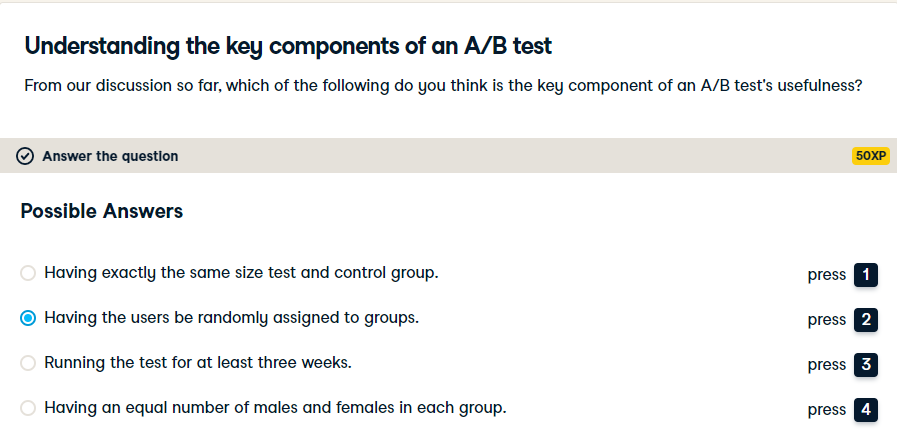

Correct! Randomness helps ensure nothing else is impacting our observed results.

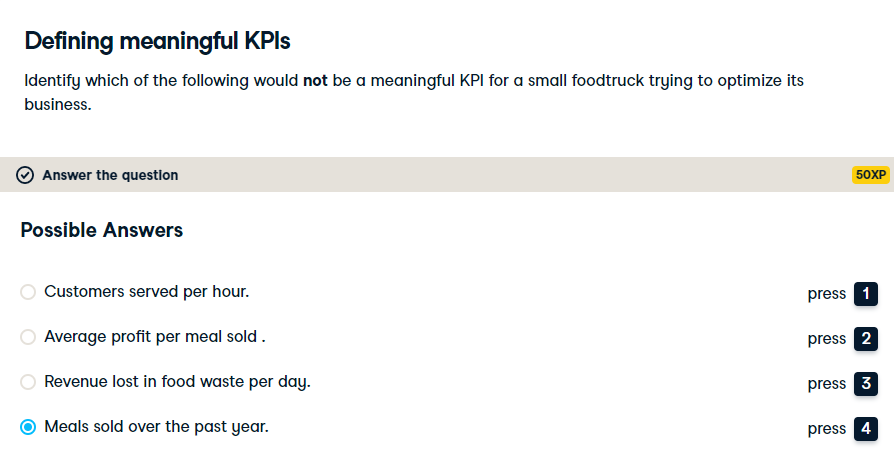

Correct! For some businesses yearly metrics are useful. But for a food truck trying to optimize its sales this is too long of a period.

## Identifying and understanding KPIs

### Loading & examining our data

Let's begin by loading and examining two datasets: one that contains a set of user demographics and the other -- a set of data relating to in-app purchases for our meditation app.

**Instructions**

- Import pandas as pd.

- Load the file 'customer_data.csv' as a DataFrame called customer_data.

- Load the file 'inapp_purchases.csv' as a DataFrame called app_purchases.

- Print the columns of customer_data and then app_purchases using their .columns attribute.

In [2]:
# Import pandas 
import pandas as pd

# Load the customer_data
customer_data = pd.read_csv('customer_data.csv')

# Load the app_purchases
app_purchases = pd.read_csv('inapp_purchases.csv')

# Print the columns of customer data
print(customer_data.columns)

# Print the columns of app_purchases
print(app_purchases.columns)

Index(['uid', 'reg_date', 'device', 'gender', 'country', 'age'], dtype='object')
Index(['date', 'uid', 'sku', 'price'], dtype='object')


In [3]:
customer_data.head()

,uid,reg_date,device,gender,country,age
0,54030035.000,2017-06-29T00:00:00Z,and,M,USA,19
1,72574201.000,2018-03-05T00:00:00Z,iOS,F,TUR,22
2,64187558.000,2016-02-07T00:00:00Z,iOS,M,USA,16
3,92513925.000,2017-05-25T00:00:00Z,and,M,BRA,41
4,99231338.000,2017-03-26T00:00:00Z,iOS,M,FRA,59


In [4]:
customer_data.reg_date = customer_data.reg_date.map(lambda x : x[:10], na_action = 'ignore')
customer_data.reg_date

0       2017-06-29
1       2018-03-05
2       2016-02-07
3       2017-05-25
4       2017-03-26
           ...    
9995    2016-11-23
9996    2016-08-21
9997    2015-08-20
9998    2017-04-08
9999    2018-02-23
Name: reg_date, Length: 10000, dtype: object

In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   uid       10000 non-null  float64
 1   reg_date  10000 non-null  object 
 2   device    10000 non-null  object 
 3   gender    10000 non-null  object 
 4   country   10000 non-null  object 
 5   age       10000 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB


In [6]:
app_purchases.head()

,date,uid,sku,price
0,2017-07-10,41195147.000,sku_three_499,499.000
1,2017-07-15,41195147.000,sku_three_499,499.000
2,2017-11-12,41195147.000,sku_four_599,599.000
3,2017-09-26,91591874.000,sku_two_299,299.000
4,2017-12-01,91591874.000,sku_four_599,599.000


In [7]:
app_purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9007 entries, 0 to 9006
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    9007 non-null   object 
 1   uid     9006 non-null   float64
 2   sku     9006 non-null   object 
 3   price   9006 non-null   float64
dtypes: float64(2), object(2)
memory usage: 281.6+ KB


Great start! Notice that both datasets have a common 'uid' column. You can use this to merge them!

### Merging on different sets of fields

As you saw in the previous exercise, both customer_data and app_purchases have a common 'uid' column that you can use to combine them. If you explored them further, you would discover that they also have a common date column that is named 'date' in app_purchases and 'reg_date' in customer_data.

In this exercise you will explore merging on both of these columns and looking at how this impacts your final results.

The two datasets from the previous exercise - customer_data and app_purchases- have been loaded for you, with 'reg_date' in customer_data renamed to 'date'.

**Instructions**

- Merge customer_data with app_purchases, combining on the 'uid' column.

- To look at purchases that happened on the date of registration, merge customer_data to app_purchases on 'uid' and 'date'.

In [8]:
# Merge on the 'uid' field
uid_combined_data = app_purchases.merge(customer_data, on=['uid'], how='inner')

# Examine the results 
print(uid_combined_data.head())
print(len(uid_combined_data))

         date          uid            sku   price    reg_date device gender  \
0  2017-07-10 41195147.000  sku_three_499 499.000  2017-06-26    and      M   
1  2017-07-15 41195147.000  sku_three_499 499.000  2017-06-26    and      M   
2  2017-11-12 41195147.000   sku_four_599 599.000  2017-06-26    and      M   
3  2017-09-26 91591874.000    sku_two_299 299.000  2017-01-05    and      M   
4  2017-12-01 91591874.000   sku_four_599 599.000  2017-01-05    and      M   

  country  age  
0     BRA   17  
1     BRA   17  
2     BRA   17  
3     TUR   17  
4     TUR   17  
9006


In [9]:
customer_data = customer_data.rename(columns={'reg_date': 'date'})
customer_data.columns

Index(['uid', 'date', 'device', 'gender', 'country', 'age'], dtype='object')

In [10]:
# Merge on the 'uid' and 'date' field
uid_date_combined_data = app_purchases.merge(customer_data, on=['uid', 'date'], how='inner')

# Examine the results 
print(uid_date_combined_data.head())
print(len(uid_date_combined_data))

         date          uid             sku   price device gender country  age
0  2016-03-30 94055095.000    sku_four_599 599.000    iOS      F     BRA   16
1  2015-10-28 69627745.000     sku_one_199 199.000    and      F     BRA   18
2  2017-02-02 11604973.000  sku_seven_1499 499.000    and      F     USA   16
3  2016-06-05 22495315.000    sku_four_599 599.000    and      F     USA   19
4  2018-02-17 51365662.000     sku_two_299 299.000    iOS      M     TUR   16
35


Awesome! Note our second result returned fewer rows compared to the first one - 35 compared to 9006! This is because there were fewer matches

## Exploratory analysis of KPIs


This chapter teaches you how to visualize, manipulate, and explore KPIs as they change over time. Through a variety of examples, you'll learn how to work with datetime objects to calculate metrics per unit time. Then we move to the techniques for how to graph different segments of data, and apply various smoothing functions to reveal hidden trends. Finally we walk through a complete example of how to pinpoint issues through exploratory data analysis of customer data. Throughout this chapter various functions are introduced and explained in a highly generalizable way.

### Practicing aggregations

It's time to begin exploring the in-app purchase data in more detail. Here, you will practice aggregating the dataset in various ways using the .agg() method and then examine the results to get an understanding of the overall data, as well as a feel for how to aggregate data using pandas.

Loaded for you is a DataFrame named purchase_data which is the dataset of in-app purchase data merged with the user demographics data from earlier.

Before getting started, it's good practice to explore this purchase_data DataFrame in the IPython Shell. In particular, notice the price column: you'll examine it further in this exercise.

**Instructions**

- Find the 'mean' purchase price paid across our dataset. Then examine the output before moving on.

- Now, use the .agg() method to find the 'mean' and 'median' prices together.

- Now, find the 'mean' and 'median' for both the 'price' paid and the 'age' of purchaser.

In [12]:
# Load the customer_data
user_demographics = pd.read_csv('user_demographics_data.csv')

# Print the columns of customer data
print(user_demographics.columns)

# Print the columns of app_purchases
print(app_purchases.columns)

Index(['uid', 'reg_date', 'device', 'gender', 'country', 'age'], dtype='object')
Index(['date', 'uid', 'sku', 'price'], dtype='object')


In [13]:
user_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   uid       10000 non-null  float64
 1   reg_date  10000 non-null  object 
 2   device    10000 non-null  object 
 3   gender    10000 non-null  object 
 4   country   10000 non-null  object 
 5   age       10000 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB


In [14]:
user_demographics.reg_date = user_demographics.reg_date.map(lambda x : x[:10], na_action = 'ignore')
user_demographics.reg_date

0       2017-06-29
1       2018-03-05
2       2016-02-07
3       2017-05-25
4       2017-03-26
           ...    
9995    2016-11-23
9996    2016-08-21
9997    2015-08-20
9998    2017-04-08
9999    2018-02-23
Name: reg_date, Length: 10000, dtype: object

In [15]:
user_demographics = user_demographics.rename(columns={'reg_date': 'date'})
user_demographics.columns

Index(['uid', 'date', 'device', 'gender', 'country', 'age'], dtype='object')

In [16]:
user_demographics.uid = user_demographics.uid.astype('float64')

In [17]:
user_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   uid      10000 non-null  float64
 1   date     10000 non-null  object 
 2   device   10000 non-null  object 
 3   gender   10000 non-null  object 
 4   country  10000 non-null  object 
 5   age      10000 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB


In [18]:
# Merge on the 'uid' and 'date' field
purchase_data = app_purchases.merge(user_demographics, on=['date'], how='inner')

# Examine the results 
print(purchase_data.head())
print(len(purchase_data))

         date        uid_x            sku   price        uid_y device gender  \
0  2017-07-10 41195147.000  sku_three_499 499.000 13017133.000    iOS      F   
1  2017-07-10 41195147.000  sku_three_499 499.000 64075836.000    and      M   
2  2017-07-10 41195147.000  sku_three_499 499.000 29729462.000    and      M   
3  2017-07-10 41195147.000  sku_three_499 499.000 77833670.000    and      F   
4  2017-07-10 41195147.000  sku_three_499 499.000 61100865.000    iOS      M   

  country  age  
0     CAN   15  
1     FRA   20  
2     BRA   16  
3     DEU   32  
4     BRA   22  
125271


In [19]:
# Calculate the mean purchase price 
purchase_price_mean = uid_combined_data.price.agg('mean')

# Examine the output 
print(purchase_price_mean)

406.77259604707973


In [20]:
# Calculate the mean and median purchase price 
purchase_price_summary = uid_combined_data.price.agg(['mean', 'median'])

# Examine the output 
print(purchase_price_summary)

mean     406.773
median   299.000
Name: price, dtype: float64


In [21]:
# Calculate the mean and median of price and age
purchase_summary = uid_combined_data.agg({'price': ['mean', 'median'], 'age': ['mean', 'median']})

# Examine the output 
print(purchase_summary)

         price    age
mean   406.773 23.922
median 299.000 21.000


Nicely done! Notice how the mean is higher than the median? This suggests that we have some users who are making a lot of purchases!

### Grouping & aggregating

You'll be using .groupby() and .agg() a lot in this course, so it's important to become comfortable with them. In this exercise, your job is to calculate a set of summary statistics about the purchase data broken out by 'device' (Android or iOS) and 'gender' (Male or Female).

Following this, you'll compare the values across these subsets, which will give you a baseline for these values as potential KPIs to optimize going forward.

The purchase_data DataFrame from the previous exercise has been pre-loaded for you. As a reminder, it contains purchases merged with user demographics.

**Instructions**

- Group the purchase_data DataFrame by 'device' and 'gender' in that order.

- Aggregate grouped_purchase_data, finding the 'mean', 'median', and the standard deviation ('std') of the purchase price, in that order, across these groups.

- Examine the results. Does the mean differ drastically from the median? How much variability is in each group?

In [22]:
# Group the data 
grouped_purchase_data = uid_combined_data.groupby(by = ['device', 'gender'])

# Aggregate the data
purchase_summary = grouped_purchase_data.agg({'price': ['mean', 'median', 'std']})

# Examine the results
print(purchase_summary)

                price                
                 mean  median     std
device gender                        
and    F      400.748 299.000 179.984
       M      416.237 499.000 195.002
iOS    F      404.435 299.000 181.525
       M      405.272 299.000 196.843


Awesome! These values provide a great summary of the customer data which will be useful as you move to optimizing the conversion rate.

## Calculating KPIs - a practical examle

### Calculating KPIs

You're now going to take what you've learned and work through calculating a KPI yourself. Specifically, you'll calculate the average amount paid per purchase within a user's first 28 days using the purchase_data DataFrame from before.

This KPI can provide a sense of the popularity of different in-app purchase price points to users within their first month.

**Instructions**

- Subtract timedelta(days=28) from current_date to find the last date that we will count purchases from. The current_date variable has already been defined.

- Filter out all users in purchase_data who registered in the last 28 days. That is, users whose purchase_data.reg_date is less than max_purchase_date.

- Filter this dataset to only include purchases that occurred on a date within the first 28 days. Recall that the date of purchase is stored in the date column.

- Find the mean of the price paid on purchases in purchase_data_filt.

In [23]:
# Compute max_purchase_date 

from pandas import Timestamp
from datetime import timedelta
current_date = Timestamp(2018,3,17)

max_purchase_date = current_date - timedelta(days=28)
max_purchase_date

Timestamp('2018-02-17 00:00:00')

In [24]:
uid_combined_data['reg_date'] = pd.to_datetime(uid_combined_data['reg_date'])

In [25]:
# Filter to only include users who registered before our max date
purchase_data_filt = uid_combined_data[uid_combined_data.reg_date < max_purchase_date]
purchase_data_filt

,date,uid,sku,price,reg_date,device,gender,country,age
0,2017-07-10,41195147.000,sku_three_499,499.000,2017-06-26,and,M,BRA,17
1,2017-07-15,41195147.000,sku_three_499,499.000,2017-06-26,and,M,BRA,17
2,2017-11-12,41195147.000,sku_four_599,599.000,2017-06-26,and,M,BRA,17
3,2017-09-26,91591874.000,sku_two_299,299.000,2017-01-05,and,M,TUR,17
4,2017-12-01,91591874.000,sku_four_599,599.000,2017-01-05,and,M,TUR,17
...,...,...,...,...,...,...,...,...,...
9001,2017-09-16,63245432.000,sku_five_899,899.000,2016-12-04,and,F,FRA,20
9002,2017-04-21,36350096.000,sku_seven_1499,499.000,2017-04-07,and,M,USA,23
9003,2017-06-04,36350096.000,sku_three_499,499.000,2017-04-07,and,M,USA,23
9004,2017-07-12,36350096.000,sku_one_199,199.000,2017-04-07,and,M,USA,23


In [26]:
purchase_data_filt = purchase_data_filt[(purchase_data_filt.date <=
                                         purchase_data_filt.reg_date + 
                                         timedelta(days=28))]
purchase_data_filt

,date,uid,sku,price,reg_date,device,gender,country,age
0,2017-07-10,41195147.000,sku_three_499,499.000,2017-06-26,and,M,BRA,17
1,2017-07-15,41195147.000,sku_three_499,499.000,2017-06-26,and,M,BRA,17
19,2016-05-12,22870987.000,sku_four_599,599.000,2016-04-20,iOS,F,BRA,26
34,2017-01-12,88736154.000,sku_five_899,899.000,2017-01-08,and,F,BRA,19
92,2016-12-08,45588501.000,sku_four_599,599.000,2016-11-27,and,F,USA,49
109,2017-10-27,11317978.000,sku_three_499,499.000,2017-10-08,and,M,USA,34
111,2017-11-18,64385442.000,sku_four_599,599.000,2017-11-11,iOS,F,USA,18
121,2017-10-07,68561600.000,sku_three_499,499.000,2017-10-01,and,F,USA,34
128,2017-09-02,28815740.000,sku_one_199,199.000,2017-08-14,iOS,M,USA,18
150,2017-06-07,55317289.000,sku_two_299,299.000,2017-05-30,and,M,FRA,32


In [27]:
# Output the mean price paid per purchase
print(purchase_data_filt.price.agg('mean'))

414.4237288135593


Interesting! Since our average price is 414 cents which is below $4.99 it seems that our purchasers tend towards the lower priced set of options.

### Average purchase price by cohort

Building on the previous exercise, let's look at the same KPI, average purchase price, and a similar one, median purchase price, within the first 28 days. Additionally, let's look at these metrics not limited to 28 days to compare.

We can calculate these metrics across a set of cohorts and see what differences emerge. This is a useful task as it can help us understand how behaviors vary across cohorts.

Note that in our data the price variable is given in cents.

**Instructions**

- Use np.where to create an array month1 containing:

    - the price of the purchase purchase, if

        1. the user registration .reg_date occurred at most 28 days ago (i.e. before max_reg_date), and

        2. the date of purchase .date occurred within 28 days of registration date .reg_date;

    -NaN, otherwise.

- Now, group purchase_data by gender and then device using the .groupby() method.

- Aggregate the "mean" and "median" of both 'month1' and'price' using the .agg() method in the listed order of aggregations and fields.

In [28]:
# Set the max registration date to be one month before today

from pandas import Timestamp
from datetime import timedelta
current_date = Timestamp(2018,3,17)

max_reg_date = current_date - timedelta(days=28)

# Find the month 1 values:
month1 = np.where((uid_combined_data.reg_date < max_reg_date) &
                 (uid_combined_data.date < uid_combined_data.reg_date + timedelta(days=28)),
                  uid_combined_data.price, 
                  np.NaN)
                 
# Update the value in the DataFrame 
uid_combined_data['month1'] = month1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
# Group the data by gender and device 
purchase_data_upd = uid_combined_data.groupby(by=['gender', 'device'], as_index=False)

In [30]:
# Aggregate the month1 and price data 
purchase_summary = purchase_data_upd.agg(
                        {'month1': ['mean', 'median'],
                        'price': ['mean', 'median']})

# Examine the results 
print(purchase_summary)

  gender device  month1           price        
                   mean  median    mean  median
0      F    and 388.205 299.000 400.748 299.000
1      F    iOS 432.588 499.000 404.435 299.000
2      M    and 413.706 399.000 416.237 499.000
3      M    iOS 433.314 499.000 405.272 299.000


Great! This value seems relatively stable over the past 28 days. Congratulations on completing Chapter 1! In the next chapter, you'll explore and visualize customer behavior in more detail.

# 2. Exploring and Visualizing Customer Behavior

## Working with time series data in pandas

### Parsing dates

In this exercise you will practice parsing dates in Python. While often data pulled from a database will be correctly formatted, other data sources can be less nice. Knowing how to properly parse dates is crucial to get the data in a workable format. For reference refer to http://strftime.org/ throughout this exercise to see date format to use.

**Instructions**

- Provide the correct format for the following date: Saturday January 27, 2017

- Provide the correct format for the following date: 2017-08-01

- Provide the correct format for the following date: 08/17/1978

- Provide the correct format for the following date: 2016 March 01 01:56

In [31]:
# Provide the correct format for the date

date_data_one = 'Saturday January 27, 2017'

date_data_one = pd.to_datetime(date_data_one, format="%A %B %d, %Y")
print(date_data_one)

2017-01-27 00:00:00


In [32]:
# Provide the correct format for the date

date_data_two = '2017-08-01'

date_data_two = pd.to_datetime(date_data_two, format="%Y-%m-%d")
print(date_data_two)

2017-08-01 00:00:00


In [33]:
# Provide the correct format for the date

date_data_three = '08/17/1978'

date_data_three = pd.to_datetime(date_data_three, format="%m/%d/%Y")
print(date_data_three)

1978-08-17 00:00:00


In [34]:
# Provide the correct format for the date

date_data_four = '2016 March 01 01:56'

date_data_four = pd.to_datetime(date_data_four, format="%Y %B %d %H:%M")
print(date_data_four)

2016-03-01 01:56:00


Wonderful work! Quickly being able to parse a variety of date formats can make your work analyzing customer data a lot easier.

## Creating time series graphs with matplotlib

### Plotting time series data

In trying to boost purchases, we have made some changes to our introductory in-app purchase pricing. In this exercise, you will check if this is having an impact on the number of purchases made by purchasing users during their first week.

The dataset user_purchases has been joined to the demographics data and properly filtered. The column 'first_week_purchases' that is 1 for a first week purchase and 0 otherwise has been added. This column is converted to the average number of purchases made per day by users in their first week.

We will try to view the impact of this change by looking at a graph of purchases as described in the instructions.

**Instructions**

- Read through and understand code shown and then plot the user_purchases data with 'reg_date' on the x-axis and 'first_week_purchases' on the y-axis.

In [110]:
# Group the data and aggregate first_week_purchases
user_purchases = user_purchases.groupby(by=['reg_date', 'uid']).agg({'first_week_purchases': ['sum']})

# Reset the indexes
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

# Find the average number of purchases per day by first-week users
user_purchases = user_purchases.groupby(by=['reg_date']).agg({'first_week_purchases': ['mean']})
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

# Plot the results
user_purchases.plot(x="reg_date", y="first_week_purchases")
plt.show()

NameError: name 'user_purchases' is not defined

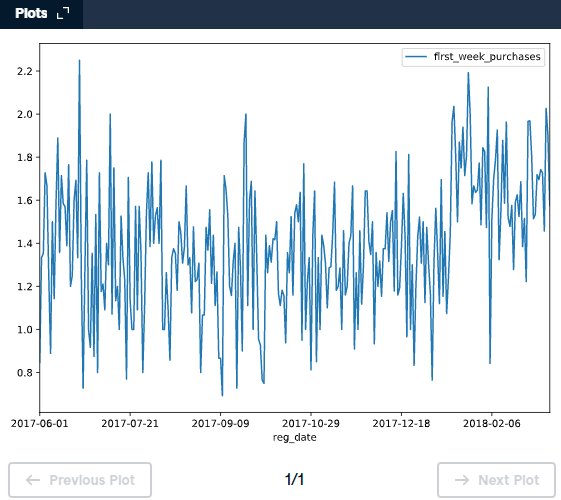

Fantastic Job! There does indeed seem to be a substantial increase in the average number of first week purchases!

### Pivoting our data

As you saw, there does seem to be an increase in the number of purchases by purchasing users within their first week. Let's now confirm that this is not driven only by one segment of users. We'll do this by first pivoting our data by 'country' and then by 'device'. Our change is designed to impact all of these groups equally.

The user_purchases data from before has been grouped and aggregated by the 'country' and 'device' columns. These objects are available in your workspace as user_purchases_country and user_purchases_device.

As a reminder, .pivot_table() has the following signature:

pd.pivot_table(data, values, columns, index)

**Instructions**

- Pivot the user_purchases_country table such that we have our first_week_purchases as our values, the country as the column, and our reg_date as the row.

- Now lets look at our device data. Let us pivot the user_purchases_device table such that we have our first_week_purchases as our values, the device as the column, and our reg_date as the row.

In [111]:
# Pivot the data
country_pivot = pd.pivot_table(user_purchases_country, values=['first_week_purchases'], columns=['country'], index=['reg_date'])
print(country_pivot.head())

NameError: name 'user_purchases_country' is not defined

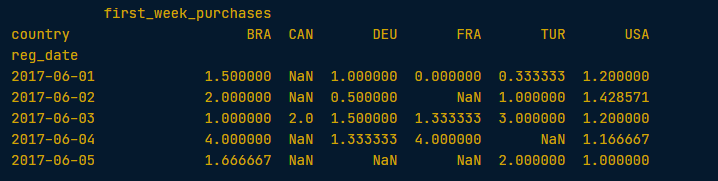

In [112]:
# Pivot the data
device_pivot = pd.pivot_table(user_purchases_device, values=['first_week_purchases'], columns=['device'], index=['reg_date'])
print(device_pivot.head())

NameError: name 'user_purchases_device' is not defined

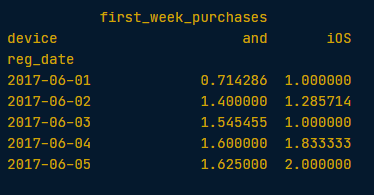

Great! Having the data in this form is not very conducive to examining trends on its own. Next we will plot the data which should illuminate anything interesting in the data.

### Examining the different cohorts

To finish this lesson, you're now going to plot by 'country' and then by 'device' and examine the results. Hopefully you will see the observed lift across all groups as designed. This would point to the change being the cause of the lift, not some other event impacting the purchase rate.

**Instructions**

- Plot the average first week purchases for each country by registration date ('reg_date'). There are 6 countries here: 'USA', 'CAN', 'FRA', 'BRA', 'TUR', and 'DEU'. Plot them in the order shown.

- Now, plot the average first week purchases for each device ('and' and 'iOS') by registration date ('reg_date'). Plot the devices in the order listed.

In [113]:
# Plot the average first week purchases for each country by registration date
country_pivot.plot(x='reg_date', y=['USA', 'CAN', 'FRA', 'BRA', 'TUR', 'DEU'])
plt.show()

NameError: name 'country_pivot' is not defined

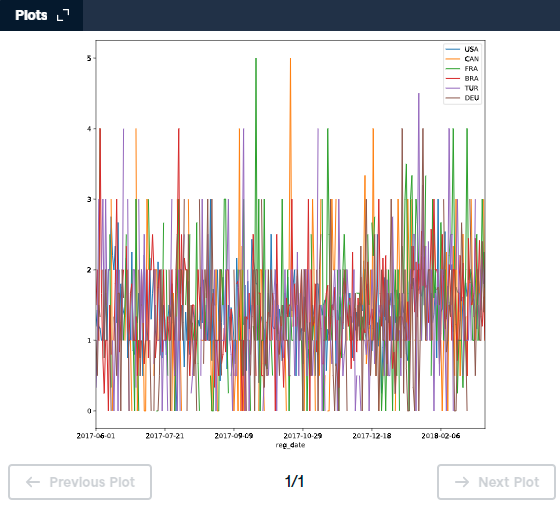

In [114]:
# Plot the average first week purchases for each device by registration date
device_pivot.plot(x='reg_date', y=['and', 'iOS'])
plt.show()

NameError: name 'device_pivot' is not defined

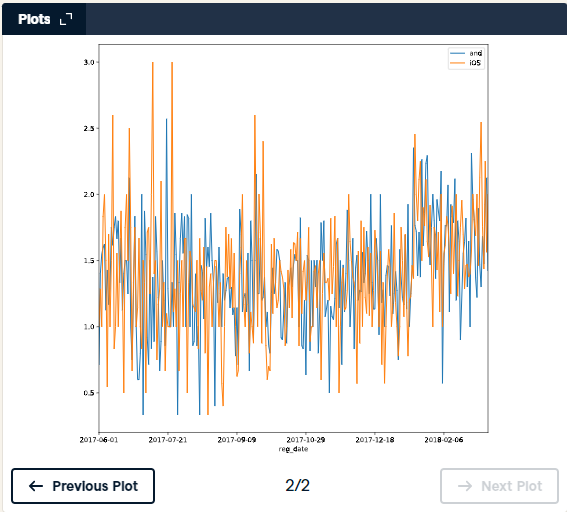

Great, it looks like our change is causing the observed result! Expand the plot into a new window to see it in more detail.

## Understanding and visualizing trends

### Seasonality and moving averages

Stepping back, we will now look at the overall revenue data for our meditation app. We saw strong purchase growth in one of our products, and now we want to see if that is leading to a corresponding rise in revenue. As you may expect, revenue is very seasonal, so we want to correct for that and unlock macro trends.

In this exercise, we will correct for weekly, monthly, and yearly seasonality and plot these over our raw data. This can reveal trends in a very powerful way.

The revenue data is loaded for you as daily_revenue.

**Instructions**

- Using the .rolling() method, find the rolling average of the data with a 7 day window and store it in a column 7_day_rev.

- Find the monthly (28 days) rolling average and store it in a column 28_day_rev.

- Find the yearly (365 days) rolling average and store it in a column 365_day_rev.

- Hit 'Submit Answer' to plot the three calculated rolling averages together along with the raw data.

In [115]:
# Load the app_purchases
daily_revenue = pd.read_csv('daily_revenue_data.csv')

In [116]:
daily_revenue.head()

,index,gender,device,revenue,date,country
0,1,male,ios,186557.000,2013-09-20T00:00:00Z,USA
1,2,male,ios,177217.000,2013-09-21T00:00:00Z,USA
2,3,male,ios,177197.000,2013-09-22T00:00:00Z,USA
3,4,male,ios,157193.000,2013-09-23T00:00:00Z,USA
4,5,male,ios,165592.000,2013-09-24T00:00:00Z,USA


In [117]:
daily_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48001 entries, 0 to 48000
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    48001 non-null  int64  
 1   gender   48000 non-null  object 
 2   device   48000 non-null  object 
 3   revenue  48000 non-null  float64
 4   date     48000 non-null  object 
 5   country  48000 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.2+ MB


In [118]:
daily_revenue.date = daily_revenue.date.map(lambda x : x[:10], na_action = 'ignore')
daily_revenue.date

0        2013-09-20
1        2013-09-21
2        2013-09-22
3        2013-09-23
4        2013-09-24
            ...    
47996    2016-12-29
47997    2016-12-30
47998    2016-12-31
47999    2017-01-01
48000           NaN
Name: date, Length: 48001, dtype: object

In [119]:
daily_revenue['date'] = pd.to_datetime(daily_revenue['date'])

<IPython.core.display.Javascript object>

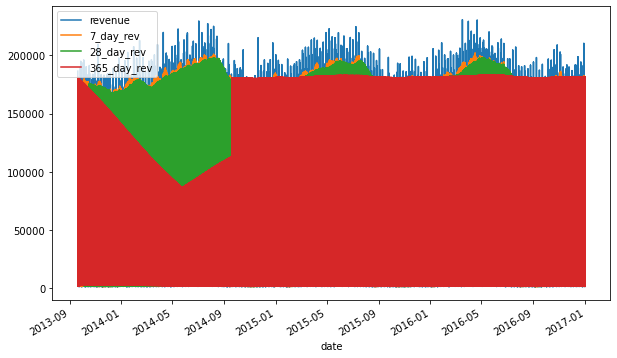

In [120]:
# Compute 7_day_rev
daily_revenue['7_day_rev'] = daily_revenue.revenue.rolling(window=7,center=False).mean()

# Compute 28_day_rev
daily_revenue['28_day_rev'] = daily_revenue.revenue.rolling(window=28,center=False).mean()
    
# Compute 365_day_rev
daily_revenue['365_day_rev'] = daily_revenue.revenue.rolling(window=365,center=False).mean()
    
# Plot date, and revenue, along with the 3 rolling functions (in order)    
daily_revenue.plot(x='date', y=['revenue', '7_day_rev', '28_day_rev', '365_day_rev'])
plt.show()

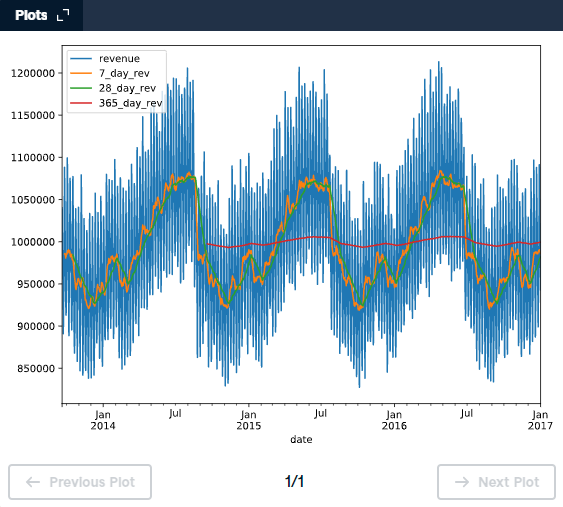

Great work! Notice that while there is a lot of seasonality, our revenue seems to be somewhat flat over this time period.

### Exponential rolling average & over/under smoothing

In the previous exercise, we saw that our revenue is somewhat flat over time. In this exercise we will dive deeper into the data to see if we can determine why this is the case. We will look at the revenue for a single in-app purchase product we are selling to see if this potentially reveals any trends. As this will have less data then looking at our overall revenue it will be much noisier. To account for this we will smooth the data using an exponential rolling average.

A new daily_revenue dataset has been provided for us, containing the revenue for this product.

**Instructions**

- Using the .ewm() method, calculate the exponential rolling average with a span of 10 and store it in a column small_scale.

- Repeat the previous step, now with a span of 100 and store it in a column medium_scale.

- Finally, calculate the exponential rolling average with a span of 500 and store it in a column large_scale.

- Plot the three averages, along with the raw data. Examine how clear the trend of the data is.

<IPython.core.display.Javascript object>

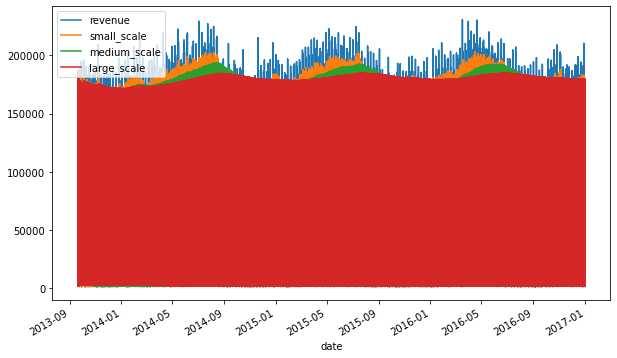

In [121]:
# Calculate 'small_scale'
daily_revenue['small_scale'] = daily_revenue.revenue.ewm(span=10).mean()

# Calculate 'medium_scale'
daily_revenue['medium_scale'] = daily_revenue.revenue.ewm(span=100).mean()

# Calculate 'large_scale'
daily_revenue['large_scale'] = daily_revenue.revenue.ewm(span=500).mean()

# Plot 'date' on the x-axis and, our three averages and 'revenue'
# on the y-axis
daily_revenue.plot(x = "date", y =['revenue', 'small_scale', 'medium_scale', 'large_scale'])
plt.show()

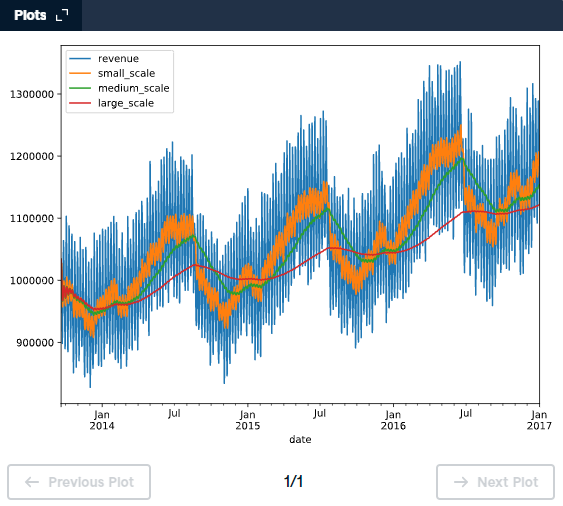

Great work! Note that the medium window strikes the right balance. Revenue seems to be growing in this product so it must not be the cause of the overall flat revenue trend!

## Events and releases

### Visualizing user spending

Recently, the Product team made some big changes to both the Android & iOS apps. They do not have any direct concerns about the impact of these changes, but want you to monitor the data to make sure that the changes don't hurt company revenue. Additionally, the product team believes that some of these changes may impact female users more than male users.

In this exercise you're going to plot the monthly revenue for one of the updated products and evaluate the results.

The dataset user_revenue containing the 'device', 'gender', 'country', 'date', and 'revenue' has been loaded. It has been grouped by month, device, and gender. Note that here, a 'month' column has been extracted from the 'date' column.

**Instructions**

- Pivot user_revenue such that we have the 'month' as the rows (index),'device' and 'gender' as our columns and 'revenue' as our values.

- Remove the first and last row of the DataFrame once pivoted to prevent discontinuities from distorting the results. This has been done for you.

- Plot pivoted_data using its .plot() method.

In [122]:
daily_revenue.head()

,index,gender,device,revenue,date,country,7_day_rev,28_day_rev,365_day_rev,small_scale,medium_scale,large_scale
0,1,male,ios,186557.000,2013-09-20,USA,NaN,NaN,NaN,186557.000,186557.000,186557.000
1,2,male,ios,177217.000,2013-09-21,USA,NaN,NaN,NaN,181420.000,181840.300,181877.660
2,3,male,ios,177197.000,2013-09-22,USA,NaN,NaN,NaN,179722.382,180261.476,180311.195
3,4,male,ios,157193.000,2013-09-23,USA,NaN,NaN,NaN,172299.954,174320.202,174496.923
4,5,male,ios,165592.000,2013-09-24,USA,NaN,NaN,NaN,170374.283,172504.044,172701.662


In [123]:
from datetime import datetime

daily_revenue['month'] = daily_revenue['date'].dt.strftime('%Y-%m')
daily_revenue.head(1)

,index,gender,device,revenue,date,country,7_day_rev,28_day_rev,365_day_rev,small_scale,medium_scale,large_scale,month
0,1,male,ios,186557.000,2013-09-20,USA,NaN,NaN,NaN,186557.000,186557.000,186557.000,2013-09


In [124]:
user_revenue = daily_revenue.copy()

<IPython.core.display.Javascript object>

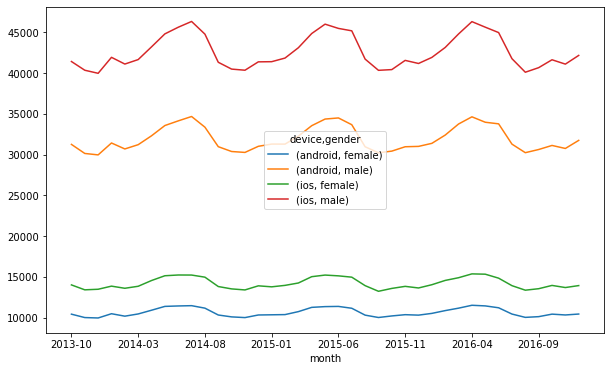

In [125]:
# Pivot user_revenue
pivoted_data = pd.pivot_table(user_revenue, values ='revenue', columns=['device','gender'], index='month')
pivoted_data = pivoted_data[1:(len(pivoted_data) -1 )]

# Create and show the plot
pivoted_data.plot()
plt.show()

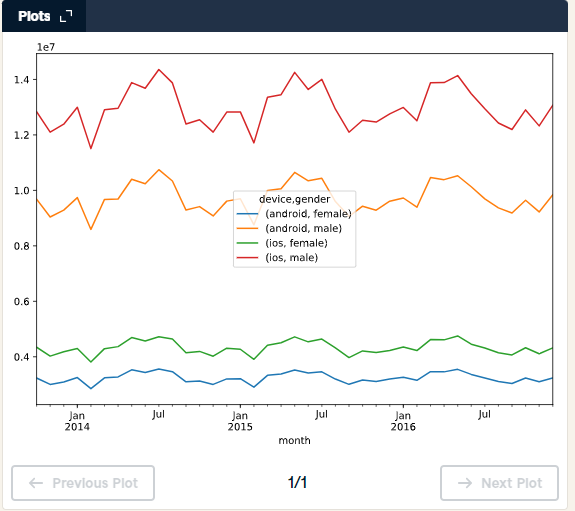

Great work! From this view, it seems like our aggregate revenue is fairly stable, so the changes are most likely not hurting revenue.

### Looking more closely at revenue

In revenue data, there tends to be a high level of seasonality. This is demonstrated in the graph on the right, which looks more closely at revenue, incorporating seasonality while also breaking down revenue by gender and device.

Take a look at the graph. Which of group of users spends the least?

**Possible Answers**

- Female Android users.

- Male iPhone users.

- Female iPhone users.

- Male Android users.

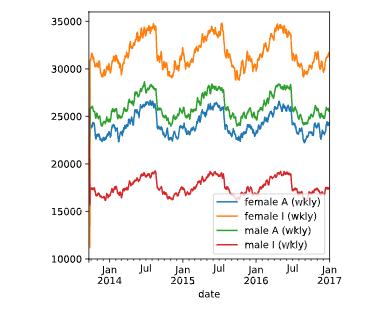

# 3. The Design and Application of A/B Testing

In this chapter you will dive fully into A/B testing. You will learn the mathematics and knowledge needed to design and successfully plan an A/B test from determining an experimental unit to finding how large a sample size is needed. Accompanying this will be an introduction to the functions and code needed to calculate the various quantities associated with a statistical test of this type.

## Introduction to A/B testing

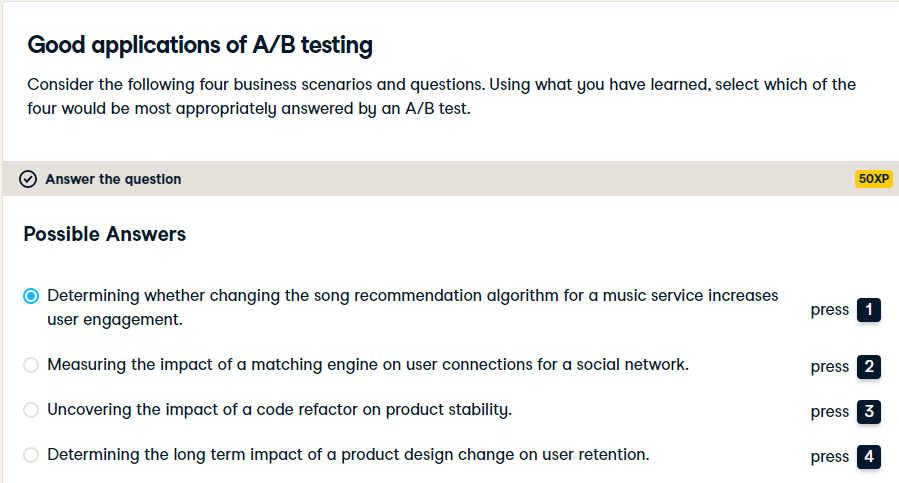

Great Job! A/B testing could be useful in a few of the scenarios, but could be best applied in this context.

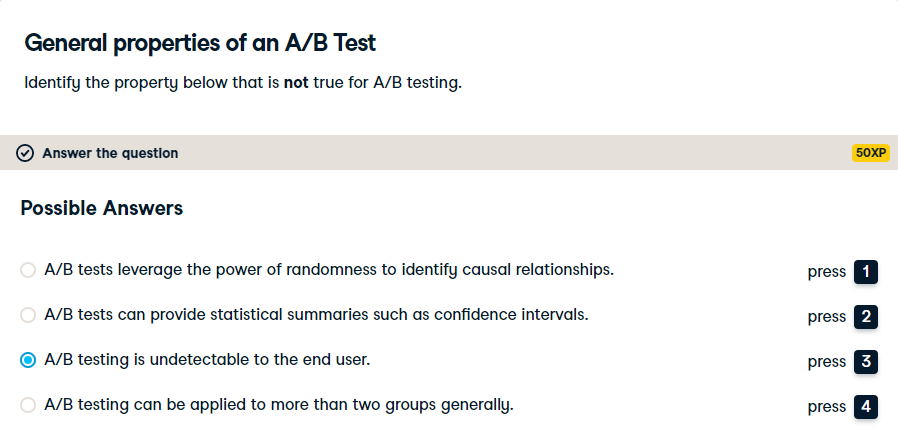

You got it! While A/B testing can be subtle, in many cases it changes the underlying user experience.

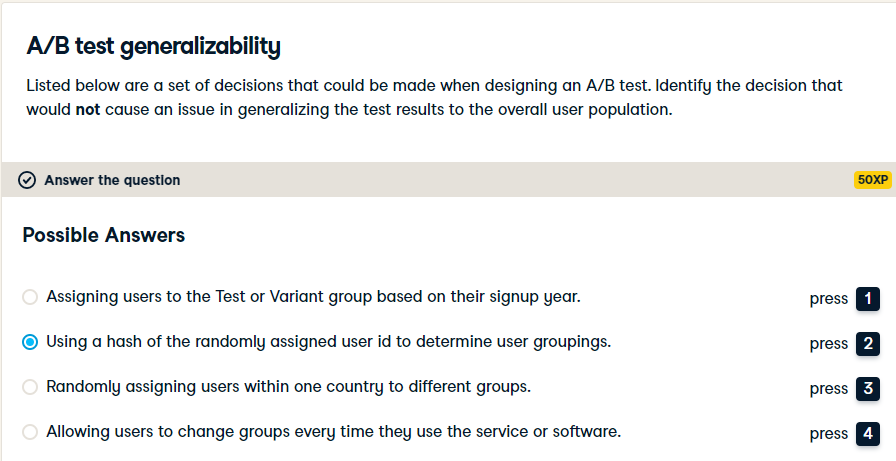

Correct! This is a fine thing to do and a common way to tie the group a user belongs to to their identity.

## Initial A/B test design

### Experimental units: Revenue per user day

We are going to check what happens when we add a consumable paywall to our app. A paywall is a feature of a website or other technology that requires payment from users in order to access additional content or services.

Here, you'll practice calculating experimental units and baseline values related to our consumable paywall. Both measure revenue only among users who viewed a paywall. Your job is to calculate revenue per user-day, with user-day as the experimental unit.

The purchase_data dataset has been loaded for you.

**Instructions**

- Extract the 'day' value from the date timestamp as you saw in the video: Using .date.dt.floor('d').

- To make the calculations easier, replace the NaN purchase_data.price values with 0 by using the np.where() method.

- Finally, find the mean amount paid per user-day among paywall viewers. To do this, you need to first aggregate the data by 'uid' and 'date', which has been done for you.

In [195]:
# Load the purchase_data
purchase_data = pd.read_csv('purchase_data_v1.csv')

In [196]:
purchase_data.head()

,date,uid,sku,price
0,2017-07-10,41195147,sku_three_499,499
1,2017-07-15,41195147,sku_three_499,499
2,2017-11-12,41195147,sku_four_599,599
3,2017-09-26,91591874,sku_two_299,299
4,2017-12-01,91591874,sku_four_599,599


In [197]:
purchase_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9006 entries, 0 to 9005
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    9006 non-null   object
 1   uid     9006 non-null   int64 
 2   sku     9006 non-null   object
 3   price   9006 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 281.6+ KB


In [198]:
purchase_data['date'] = pd.to_datetime(purchase_data['date'],  errors='coerce')
purchase_data['date'].dtype

dtype('<M8[ns]')

In [199]:
# purchase_data['date'] = purchase_data['date'].apply(lambda x: pd.to_datetime(x[0]))

In [200]:
# Extract the 'day'; value from the timestamp
purchase_data.date = purchase_data.date.dt.floor('d')

# Replace the NaN price values with 0 
purchase_data.price = np.where(np.isnan(purchase_data.price), 0, purchase_data.price)

# Aggregate the data by 'uid' & 'date'
purchase_data_agg = purchase_data.groupby(by=['uid', 'date'], as_index=False)
revenue_user_day = purchase_data_agg.sum()

# Calculate the final average
revenue_user_day = revenue_user_day.price.mean()
print(revenue_user_day)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

407.95033407572384


Awesome work! Values such as these will provide helpful context as you prepare your experiment. Now lets learn how to run an A/B test.

## Preparing to run an A/B testing

### Conversion rate sensitivities

To mix things up, we will spend the next few exercises working with the conversion rate metric we explored in Chapter One. Specifically you will work to examine what that value becomes under different percentage lifts and look at how many more conversions per day this change would result in. First you will find the average number of paywall views and purchases that were made per day in our observed sample. Good luck!

**Instructions**

- Merge the paywall_views with demographics_data tables using an 'inner' join. This will limit the result to only include users who appear in both and will remove everyone who did not view a paywall, which is what we want in this scenario.

- Group purchase_data by 'date'. The result of this is then aggregated for you by summing over the purchase field to find the total number of purchases and counting over it to find the total number of paywall views.

- Average each of the resulting sum and count fields to find the average number of purchases and paywall views per day.

- The results reflect a sample of 0.1% of our overall population for ease of use. Multiply each of daily_purchases and daily_paywall_views by 1000 so our result reflects the magnitude change if we had been observing the entire population.

In [201]:
# Load the purchase_data
demographics_data = pd.read_csv('user_demographics_data.csv')

In [202]:
demographics_data.head()

,uid,reg_date,device,gender,country,age
0,54030035.000,2017-06-29T00:00:00Z,and,M,USA,19
1,72574201.000,2018-03-05T00:00:00Z,iOS,F,TUR,22
2,64187558.000,2016-02-07T00:00:00Z,iOS,M,USA,16
3,92513925.000,2017-05-25T00:00:00Z,and,M,BRA,41
4,99231338.000,2017-03-26T00:00:00Z,iOS,M,FRA,59


In [203]:
demographics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   uid       10000 non-null  float64
 1   reg_date  10000 non-null  object 
 2   device    10000 non-null  object 
 3   gender    10000 non-null  object 
 4   country   10000 non-null  object 
 5   age       10000 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB


In [204]:
# demographics_data = demographics_data.rename(columns={'reg_date': 'date'})
# demographics_data.columns

In [205]:
# demographics_data['date'] = pd.to_datetime(demographics_data['date'])
# demographics_data['date'].dtype

In [206]:
# demographics_data['uid'] = demographics_data['uid'].astype('float64')
# demographics_data['uid'].dtype

In [207]:
# Load the purchase_data
paywall_views = pd.read_csv('paywall_data.csv')

In [208]:
paywall_views.head()

,uid,date,purchase,sku,price
0,32209877,2016-12-04T14:20:49Z,0,NaN,NaN
1,32209877,2016-12-05T22:17:12Z,0,NaN,NaN
2,32209877,2016-12-09T17:56:09Z,0,NaN,NaN
3,32209877,2016-12-13T03:07:08Z,0,NaN,NaN
4,32209877,2016-12-14T17:19:29Z,0,NaN,NaN


In [209]:
paywall_views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99896 entries, 0 to 99895
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   uid       99896 non-null  int64  
 1   date      99896 non-null  object 
 2   purchase  99896 non-null  int64  
 3   sku       3465 non-null   object 
 4   price     3465 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.8+ MB


In [210]:
paywall_views['date'] = pd.to_datetime(paywall_views['date'],  errors='coerce')
paywall_views['date'].dtype

datetime64[ns, UTC]

In [211]:
# Merge and group the datasets
purchase_data = demographics_data.merge(paywall_views,  how='inner', on=['uid'])
purchase_data.date = purchase_data.date.dt.floor('d')

# Group and aggregate our combined dataset 
daily_purchase_data = purchase_data.groupby(by=['date'], as_index=False)
daily_purchase_data = daily_purchase_data.agg({'purchase': ['sum', 'count']})

# Find the mean of each field and then multiply by 1000 to scale the result
daily_purchases = daily_purchase_data.purchase['sum'].mean()
daily_paywall_views = daily_purchase_data.purchase['count'].mean()
daily_purchases = daily_purchases * 1000
daily_paywall_views = daily_paywall_views * 1000

print(daily_purchases)
print(daily_paywall_views)

44.776119402985074
1119.4029850746267


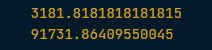

Great work! In the next exercise you will use this to evaluate different sensitivities.

### Sensitivity

Continuing with the conversion rate metric, you will now utilize the results from the previous exercise to evaluate a few potential sensitivities that we could make use of in planning our experiment. The baseline conversion_rate has been loaded for you, calculated in the same way we saw in Chapter One. Additionally the daily_paywall_views and daily_purchases values you calculated previously have been loaded.

**Instructions**

- Using the proposed small_sensitivity of 0.1, find the lift in conversion rate and purchasers that would result by applying this sensitivity. Are these resulting values reasonable?

- Now repeating the steps from before, find the lift in conversion rate and purchasers using the medium_sensitivity. In this exercise you are additionally asked to complete the step to find the increase in purchasers based on this new conversion rate.

- Finally repeat the steps from before to find the increase in conversion rate and purchasers when using the very large sensitivity of 0.5. The steps required are the same as the previous exercise. How do the results compare those returned in the previous two exercises?

In [190]:
small_sensitivity = 0.1 
# conversion_rate = (daily_purchases / daily_paywall_views)
conversion_rate = 0.03468607351645712

# Find the conversion rate when increased by the percentage of the sensitivity above
small_conversion_rate = conversion_rate * (1 + 0.1) 

# Apply the new conversion rate to find how many more users per day that translates to
small_purchasers = daily_paywall_views * small_conversion_rate

# Subtract the initial daily_purcahsers number from this new value to see the lift
purchaser_lift = small_purchasers - daily_purchases

print(small_conversion_rate)
print(small_purchasers)
print(purchaser_lift)

0.038154680868102836
42.710463658324066
-2.065655744661008


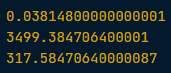

In [191]:
medium_sensitivity = 0.2

# Find the conversion rate when increased by the percentage of the sensitivity above
medium_conversion_rate = conversion_rate * (1 + 0.2) 

# Apply the new conversion rate to find how many more users per day that translates to
medium_purchasers = daily_paywall_views * medium_conversion_rate

# Subtract the initial daily_purcahsers number from this new value to see the lift
purchaser_lift = medium_purchasers - daily_purchases

print(medium_conversion_rate)
print(medium_purchasers)
print(purchaser_lift)

0.04162328821974854
46.59323308180806
1.8171136788229845


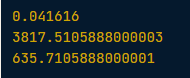

In [192]:
large_sensitivity = 0.5

# Find the conversion rate lift with the sensitivity above
large_conversion_rate = conversion_rate * (1 + 0.5)

# Find how many more users per day that translates to
large_purchasers = daily_paywall_views * large_conversion_rate
purchaser_lift = large_purchasers - daily_purchases

print(large_conversion_rate)
print(large_purchasers)
print(purchaser_lift)

0.05202911027468568
58.24154135226008
13.465421949275004


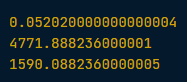

Awesome! While it seems that a 50% increase may be too drastic and unreasonable to expect, the small and medium sensitivities both seem very reasonable.

### Standard error

Previously we observed how to calculate the standard deviation using the .std() method. In this exercise, you will explore how to calculate standard deviation for a conversion rate, which requires a slightly different procedure. You will calculate this step by step in this exercise.

Loaded for you is our inner merged dataset purchase_data as well as the computed conversion_rate value.

**Instructions**

- Find the number of paywall views in the dataset using .count(). Store this in n.

- Calculate a quantity we will call v by finding the conversion_rate times the rate of not converting.

- Now find our variance, var, by dividing v by n. This is the variance of our conversion rate estimate.

- Finally the square root of var has been taken and stored as the variable se for you. This is the standard error of our estimate.

In [212]:
# Find the number of paywall views 
n = purchase_data.purchase.count()

# Calculate the quantitiy "v"
v = conversion_rate * (1 - conversion_rate) 

# Calculate the variance and standard error of the estimate
var = v / n 
se = var**0.5

print(var)
print(se)

0.00044643933093957406
0.02112911098318086


Awesome Job! Notice how closely the standard error is related to our sample size?

## Calculating sample size

### Exploring the power calculation

As discussed, power is the probability of rejecting the null hypothesis when the alternative hypothesis is true. Here you will explore some properties of the power function and see how it relates to sample size among other parameters. The get_power() function has been included and takes the following arguments in the listed order n for sample size, p1 as the baseline value, p2 as the value with lift included, and cl as the confidence level.

**Instructions**

- Calculate the power using n = 1000 and n = 2000 in that order, along with the pre-loaded parameters, p1, p2, and cl.

- Using the variable n1 for the sample size, find the power with a confidence level of cl = 0.8 and cl = 0.95 in that order.

- Hit 'Submit Answer' to compare the ratios. Which change has the bigger impact, increasing the confidence level or the sample size?

In [214]:
### Get Power Function
def get_power(n, p1, p2, cl):
    alpha = 1 - cl
    qu = stats.norm.ppf(1 - alpha/2)
    diff = abs(p2-p1)
    bp = (p1+p2) / 2
    
    v1 = p1 * (1-p1)
    v2 = p2 * (1-p2)
    bv = bp * (1-bp)
    
    power_part_one = stats.norm.cdf((n**0.5 * diff - qu * (2 * bv)**0.5) / (v1+v2) ** 0.5)
    power_part_two = 1 - stats.norm.cdf((n**0.5 * diff + qu * (2 * bv)**0.5) / (v1+v2) ** 0.5)
    
    power = power_part_one + power_part_two
    
    return (power)

In [215]:
# Look at the impact of sample size increase on power
n_param_one = get_power(n=1000, p1=p1, p2=p2, cl=cl)
n_param_two = get_power(n=2000, p1=p1, p2=p2, cl=cl)

# Look at the impact of confidence level increase on power
alpha_param_one = get_power(n=n1, p1=p1, p2=p2, cl=0.8)
alpha_param_two = get_power(n=n1, p1=p1, p2=p2, cl=0.95)
    
# Compare the ratios
print(n_param_two / n_param_one)
print(alpha_param_one / alpha_param_two)

NameError: name 'p1' is not defined

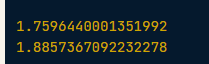

Great Job! With these particular values it looks like decreasing our confidence level has a slightly larger impact on the power than increasing our sample size

### Calculating the sample size

You're now going to utilize the sample size function to determine how many users you need for the test and control groups under various circumstances.

Included is the get_sample_size() function you viewed previously, which takes four primary arguments, power, p1, p2 and cl as described before:

def get_sample_size(power, p1, p2, cl, max_n=1000000):
    n = 1 
    while n <= max_n:
        tmp_power = get_power(n, p1, p2, cl)

        if tmp_power >= power: 
            return n 
        else: 
            n = n + 100

    return "Increase Max N Value"
    
You will continue working with the paywall conversion rate data for this exercise, which has been pre-loaded as purchase_data.

**Instructions**

- Calculate the baseline conversion_rate per paywall view by dividing the total amount spent across all purchase_data.purchase values by the count of purchase_data.purchase values in the dataset.

- Great! Using the conversion_rate value you found, calculate p2, the baseline increased by the percent lift listed.

    - Calculate the sample size needed using the parameters provided in the code comments. Remember the order of the arguments for get_sample_size is power, baseline conversion rate, lifted conversion rate and confidence level.
    
- Repeat the steps in the previous exercise only now with the new power parameter provided. How does increasing our desired power impact the outputed sample size?

In [216]:
### Get Power Function
def get_power(n, p1, p2, cl):
    alpha = 1 - cl
    qu = stats.norm.ppf(1 - alpha/2)
    diff = abs(p2-p1)
    bp = (p1+p2) / 2
    
    v1 = p1 * (1-p1)
    v2 = p2 * (1-p2)
    bv = bp * (1-bp)
    
    power_part_one = stats.norm.cdf((n**0.5 * diff - qu * (2 * bv)**0.5) / (v1+v2) ** 0.5)
    power_part_two = 1 - stats.norm.cdf((n**0.5 * diff + qu * (2 * bv)**0.5) / (v1+v2) ** 0.5)
    
    power = power_part_one + power_part_two
    
    return (power)

In [217]:
### Get Sample Size Function
def get_sample_size(power, p1, p2, cl, max_n=1000000):
    n = 1 
    while n <= max_n:
        tmp_power = get_power(n, p1, p2, cl)

        if tmp_power >= power: 
            return n 
        else: 
            n = n + 100

    return "Increase Max N Value"

In [218]:
# Merge the demographics and purchase data to only include paywall views
purchase_data = demographics_data.merge(paywall_views, how='inner', on=['uid'])
                            
# Find the conversion rate
conversion_rate = (sum(purchase_data.purchase) / purchase_data.purchase.count())
            
print(conversion_rate)

0.04


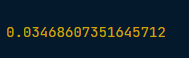

In [220]:
# Desired Power: 0.8
# CL: 0.90
# Percent Lift: 0.1
p2 = conversion_rate * (1 + 0.1)
sample_size = get_sample_size(0.8, conversion_rate, p2, 0.90)
print(sample_size)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

31101


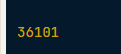

You can find p2 by adding the percentage lift listed to 1 and then multiplying by the conversion_rate found in the previous part of this exercise.

In [88]:
# Desired Power: 0.95
# CL 0.90
# Percent Lift: 0.1
p2 = conversion_rate * (1 + 0.1)
sample_size = get_sample_size(0.95, conversion_rate, p2, 0.90)
print(sample_size)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

54501


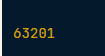

# 4. Analyzing A/B Testing Results

After running an A/B test, you must analyze the data and then effectively communicate the results. This chapter begins by interleaving the theory of statistical significance and confidence intervals with the tools you need to calculate them yourself from the data. Next we discuss how to effectively visualize and communicate these results. This chapter is the culmination of all the knowledge built over the entire course.

## Thinking critically about p-values

### Confirming our test results

To begin this chapter, you will confirm that everything ran correctly for an A/B test similar to that shown in the lesson. Like the A/B test in the lesson this one consists of trying to boost consumable sales through making changes to a paywall.

The data from the test is loaded for you as "ab_test_results" and it has already been merged with the relevant demographics data. The checks you will perform will allow you to confidently report any results you uncover.

**Instructions**

- As discussed we created our test and control groups by assigning unique users to each. Confirm the size the groups are similar by grouping by group and aggregating to find the number of unique uid in each with the pd.Series.nunique() method.

- Great! Now convert this number to the percentage of overall users in each group. This will help in presenting the result and speaking about it precisely. To do this, use the len() function and unique()method to find the number of unique uid in ab_test_results and to then divide by this result.

- Finally, additionally group by 'device' and 'gender' when finding the number of users in each group. This will let us compute our percentage calculation broken out by 'device' and 'gender' to confirm our result is truly random across cohorts.

In [221]:
ab_test_results = pd.read_csv('ab_testing_results.csv')
ab_test_results.head()

,uid,country,gender,spent,purchases,date,group,device
0,11115722,MEX,F,1595.000,5.000,2016-03-08,GRP B,I
1,11122053,USA,M,498.000,2.000,2017-07-14,GRP B,I
2,11128688,USA,F,2394.000,6.000,2017-09-17,GRP A,I
3,11130578,USA,F,1197.000,3.000,2017-11-30,GRP A,I
4,11130759,ESP,M,1297.000,3.000,2018-01-10,GRP B,A


In [222]:
ab_test_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45884 entries, 0 to 45883
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   uid        45884 non-null  int64  
 1   country    45883 non-null  object 
 2   gender     45883 non-null  object 
 3   spent      45883 non-null  float64
 4   purchases  45883 non-null  float64
 5   date       45883 non-null  object 
 6   group      45883 non-null  object 
 7   device     45883 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.8+ MB


In [223]:
# Compute and print the results
results = ab_test_results.groupby('group').agg({'uid':pd.Series.nunique}) 
print(results)

         uid
group       
GRP A  23009
GRP B  22874


In [224]:
# Find the unique users in each group 
results = ab_test_results.groupby('group').agg({'uid': pd.Series.nunique}) 

# Find the overall number of unique users using "len" and "unique"
unique_users = len(ab_test_results.uid.unique()) 

# Find the percentage in each group
results = results / unique_users * 100
print(results)

         uid
group       
GRP A 50.146
GRP B 49.852


In [225]:
# Find the unique users in each group, by device and gender
results = ab_test_results.groupby(by=['group', 'device', 'gender']).agg({'uid': pd.Series.nunique}) 

# Find the overall number of unique users using "len" and "unique"
unique_users = len(ab_test_results.uid.unique())

# Find the percentage in each group
results = results / unique_users * 100
print(results)

                       uid
group device gender       
GRP A A      F      12.240
             M      12.795
      I      F      12.542
             M      12.569
GRP B A      F      12.553
             M      12.499
      I      F      12.283
             M      12.516


Great Work! Looks like we are ready to proceed with our analysis.

### Thinking critically about p-values

Below are four statements about p-values. It is up to you to identify which one is true. This is important because p-values are an unintuitive concept and being able to reason about them correctly is extremely important in most statistical work.

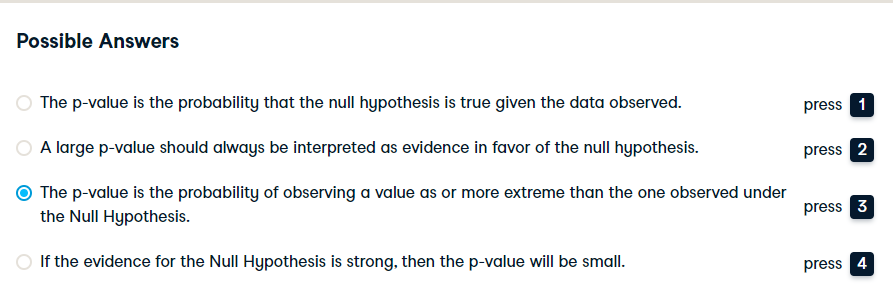

Correct, this is precisely what a p-value represents! Good Work.

## Understanding statistical significance

### Intuition behind statistical significance

In this exercise you will work to gain an intuitive understanding of statistical significance. You will do this by utilizing the get_pvalue() function on a variety of parameter sets that could reasonably arise or be chosen during the course of an A/B test. While doing this you should observing how statistical significance results vary as you change the parameters. This will help build your intuition surrounding this concept, and reveal some of the subtle pitfalls of p-values. As a reminder, this is the get_pvalue() function signature:

def get_pvalue(con_conv, test_conv, con_size, test_size):  

    lift =  - abs(test_conv - con_conv)

    scale_one = con_conv * (1 - con_conv) * (1 / con_size)
    scale_two = test_conv * (1 - test_conv) * (1 / test_size)
    scale_val = (scale_one + scale_two)**0.5

    p_value = 2 * stats.norm.cdf(lift, loc = 0, scale = scale_val )

    return p_value
    
**Instructions**

- Find the p-value with initial conversion rate of 0.1, test conversion rate of 0.17, and 1000 observations in each group.

- Find the p-value with control conversion of 0.1, test conversion of 0.15, and 100 observations in each group.

- Now find the p-value with control conversion of 0.48, test conversion of 0.50, and 1000 observations in each group.

In [226]:
def get_pvalue(con_conv, test_conv, con_size, test_size):  
    lift =  - abs(test_conv - con_conv)

    scale_one = con_conv * (1 - con_conv) * (1 / con_size)
    scale_two = test_conv * (1 - test_conv) * (1 / test_size)
    scale_val = (scale_one + scale_two)**0.5

    p_value = 2 * stats.norm.cdf(lift, loc = 0, scale = scale_val )

    return p_value

In [227]:
# Get the p-value
p_value = get_pvalue(con_conv=0.1, test_conv=0.17, con_size=1000, test_size=1000)
print(p_value)

<IPython.core.display.Javascript object>

4.131297741047306e-06


In [228]:
# Get the p-value
p_value = get_pvalue(con_conv=0.1, test_conv=0.15, con_size=100, test_size=100)
print(p_value)

<IPython.core.display.Javascript object>

0.28366948940702086


In [229]:
# Get the p-value
p_value = get_pvalue(con_conv=0.48, test_conv=0.50, con_size=1000, test_size=1000)
print(p_value)

<IPython.core.display.Javascript object>

0.370901935824383


Great Work! To recap we observed that a large lift makes us confident in our observed result, while a small sample size makes us less so, and ultimately high variance can lead to a high p-value!

### Checking for statistical significance

Now that you have an intuitive understanding of statistical significance and p-values, you will apply it to your test result data.

The four parameters needed for the p-value function are the two conversion rates - cont_conv and test_conv and the two group sizes - cont_size and test_size. These are available in your workspace, so you have everything you need to check for statistical significance in our experiment results.

**Instructions**

Find the p-value of our experiment using the loaded variables cont_conv, test_conv, cont_size, test_size calculated from our data. Then determine if our result is statistically significant by running the second section of code.

In [258]:
# Compute the p-value
p_value = get_pvalue(con_conv=cont_conv, test_conv=test_conv, con_size=cont_size, test_size=test_size)
print(p_value)

# Check for statistical significance
if p_value >= 0.05:
    print("Not Significant")
else:
    print("Significant Result")

<IPython.core.display.Javascript object>

0.370901935824383
Not Significant


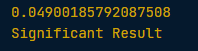

Good Work! It looks like our result is significant. Now we can continue on to provide confidence intervals.

### Understanding confidence intervals

In this exercise, you'll develop your intuition for how various parameter values impact confidence intervals. Specifically, you will explore through the get_ci() function how changes widen or tighten the confidence interval. This is the function signature, where cl is the confidence level and sd is the standard deviation.

def get_ci(value, cl, sd):
  
    loc = stats.norm.ppf(1 - cl/2)
    rng_val = stats.norm.cdf(loc - value/sd)

    lwr_bnd = value - rng_val
    upr_bnd = value + rng_val 

    return_val = (lwr_bnd, upr_bnd)
    return(return_val)
  
**Instructions**

- Find the confidence interval with a value of 1, a confidence level of 0.975 and a standard deviation of 0.5.

- Repeat the calculation, updating the confidence level to 0.95 and the standard deviation to 2. Leave the value as 1

- Finally, update your code such that the standard deviation is 0.001 while leaving the confidence level and value the same as the previous exercise part. Compare the three confidence intervals outputted. How do they seem to relate to the parameters used?

In [253]:
import scipy as sci
from scipy.stats import norm

def get_ci(value, cl, sd):
  loc = stats.norm.ppf(1 - cl/2)           
  rng_val = stats.norm.cdf(loc - value/sd) 

  lwr_bnd = value - rng_val
  upr_bnd = value + rng_val 

  return_val = (lwr_bnd, upr_bnd)
  return(return_val)

In [254]:
# Compute and print the confidence interval
confidence_interval  = get_ci(1, 0.975, 0.5)
print(confidence_interval)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(0.9755040421682947, 1.0244959578317054)


In [241]:
# Compute and print the confidence interval
confidence_interval  = get_ci(1, 0.95, 2)
print(confidence_interval)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(0.6690506448818785, 1.3309493551181215)


In [242]:
# Compute and print the confidence interval
confidence_interval  = get_ci(1, 0.95, 0.001)
print(confidence_interval)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(1.0, 1.0)


Nice! As our standard deviation decreases so too does the width of our confidence interval. Great work!

### Calculating confidence intervals

Now you will calculate the confidence intervals for the A/B test results.

The four values that have been calculated previously have been loaded for you (cont_conv, test_conv, test_size, cont_size) as variables with those names.

**Instructions**

- Calculate the mean of the distribution of our lift by subtracting cont_conv from test_conv.

- Calculate the variance of our lift distribution by completing the calculation. You must complete the control portion of the variance.

- Find the standard deviation of our lift distribution by taking the square root of the lift_variance

- Find the confidence bounds for our A/B test with a value equal to our lift_mean, a 0.95 confidence level, and our calculated lift_sd. Pass the arguments in that order.

In [255]:
# Calculate the mean of our lift distribution 
lift_mean = test_conv - cont_conv 

# Calculate variance and standard deviation 
lift_variance = (1 - test_conv) * test_conv /test_size + (1 - cont_conv) * cont_conv / cont_size
lift_sd = lift_variance**0.5

# Find the confidence intervals with cl = 0.95
confidence_interval = get_ci(lift_mean, 0.95, lift_sd)
print(confidence_interval)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(-0.18268234688858664, 0.22268234688858668)


Awesome, this really provides great context to our results! Notice that our interval is very narrow thanks to our substantial lift and large sample size.

## Interpreting your test results

### Plotting the distribution

In this exercise, you will visualize the test and control conversion rates as distributions. It is helpful to practice what was covered in the example, as this may be something you have not applied before. Additionally, viewing the data in this way can give a sense of the variability inherent in our estimation.

Four variables, the test and control variances (test_var, cont_var), and the test and control conversion rates (test_conv and cont_conv) have been loaded for you.

**Instructions**

- Using the calculated control_sd and test_sd create the range of x values to plot over. It should be 3 standard deviations in either direction from the cont_conv and test_conv respectively.

- Plot the Normal pdf of the test and control groups by specifying the conversion rate as the mean and the standard deviation in that order in mlab.normpdf()

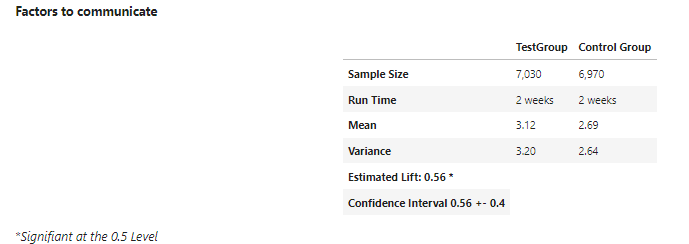

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
test_var = 1.6255542142857143e-06
cont_var = 1.411507925080655e-06
test_conv = 0.102005
cont_conv = 0.090965

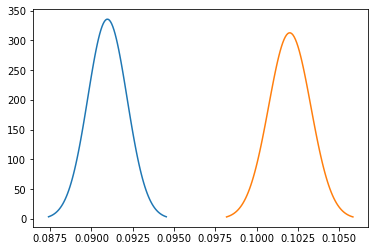

In [4]:
# Compute the standard deviations
control_sd = cont_var**0.5
test_sd = test_var**0.5

# Create the range of x values 
control_line = np.linspace( cont_conv - 3 * control_sd, cont_conv + 3 * control_sd , 100)
test_line = np.linspace( test_conv - 3 * test_sd,  test_conv + 3 * test_sd , 100)

# Plot the distribution 
plt.plot(control_line, norm.pdf(control_line, cont_conv, control_sd))
plt.plot(test_line, norm.pdf(test_line,test_conv, test_sd))
plt.show()

Solid Work! We see no overlap, which intuitively implies that our test and control conversion rates are significantly distinct.

### Plotting the difference distribution

Now lets plot the difference distribution of our results that is, the distribution of our lift.

The cont_var and test_var as well as the cont_conv and test_conv have been loaded for you. Additionally the upper and lower confidence interval bounds of this distribution have been provided as lwr_ci and upr_ci respectively.

**Instructions**

- Calculate mean of the lift distribution by subtracting the control conversion rate (cont_conv) from the test conversion rate (test_conv)

- Generate the range of x-values for the difference distribution, making it 3 standard deviations wide.

- Plot a normal distribution by specifying the calculated lift_mean and lift_sd.

- Plot a green vertical line at the distributions mean, and a red vertical lines at each of the lower and upper confidence interval bounds. This has been done for you, so hit 'Submit Answer' to see the result!

In [5]:
# lwr_ci=0.16
# upr_ci=0.96

NameError: name 'lwr_ci' is not defined

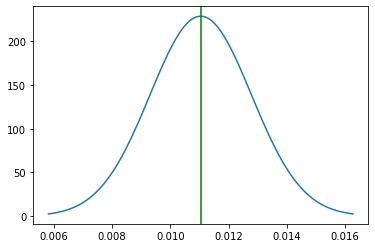

In [6]:
# Find the lift mean and standard deviation
lift_mean = test_conv - cont_conv
lift_sd = (test_var + cont_var) ** 0.5

# Generate the range of x-values
lift_line = np.linspace(lift_mean - 3 * lift_sd, lift_mean + 3 * lift_sd, 100)

# Plot the lift distribution
plt.plot(lift_line, norm.pdf(lift_line, lift_mean, lift_sd))

# Add the annotation lines
plt.axvline(x = lift_mean, color = 'green')
plt.axvline(x = lwr_ci, color = 'red')
plt.axvline(x = upr_ci, color = 'red')
plt.show()

Amazing work! This really contextualizes the lift we observed and provides more information than reporting the numerical point estimate alone would.